In [1]:
import pandas as pd
stock_data = pd.read_csv('./NVDA.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-08,17.527250,17.621588,17.250999,17.457001,17.422941,323846760
2021-06-09,17.515751,17.575001,17.255751,17.358250,17.328348,381657480
2021-06-10,17.350000,17.492001,17.176003,17.424999,17.394987,287770440
2021-06-11,17.479500,17.939224,17.443750,17.825251,17.794548,416307640
2021-06-14,17.906000,18.039499,17.662752,18.018749,17.987711,321374280


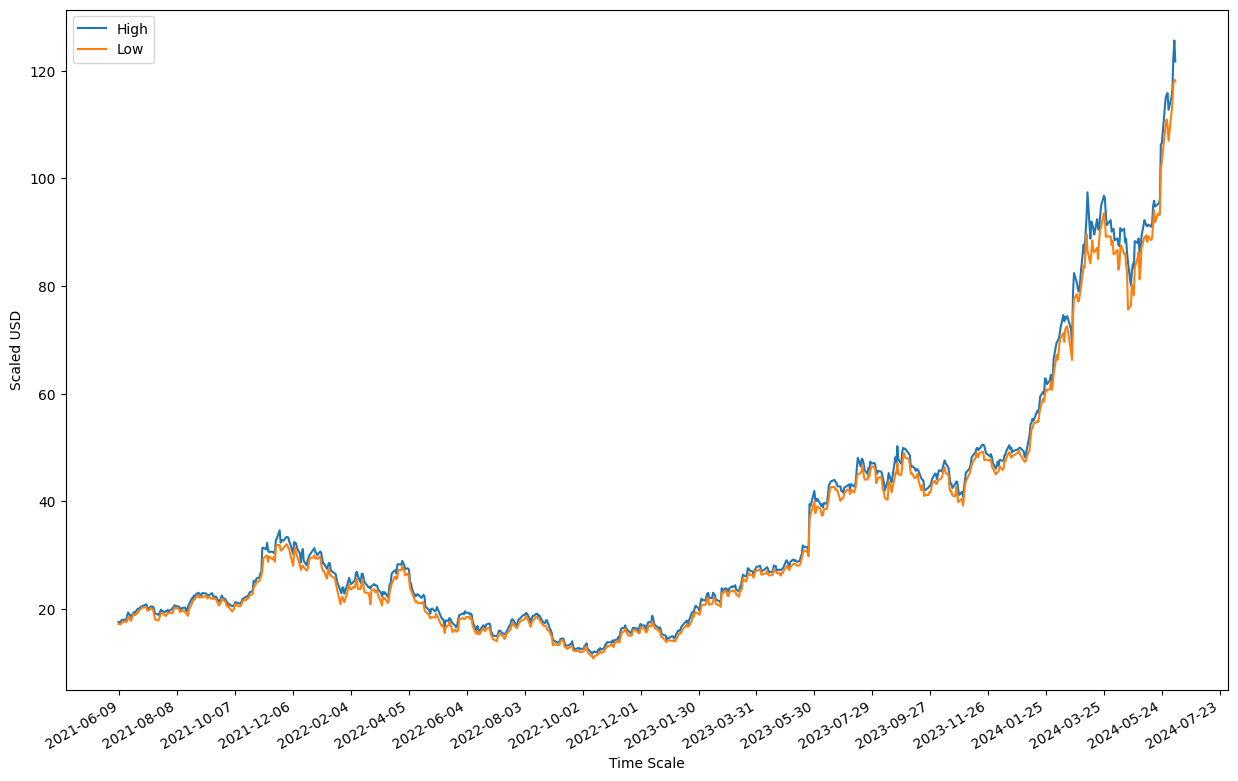

In [2]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import datetime as dt 

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

In [3]:
import numpy as np 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [4]:
# Define features and target
# Will use the Open, High, and Low columns to predict the Closing value of the Nvidia stock for the next day
target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:3]

In [5]:
# Feature Scaling to valus between -1 and 1
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data=X_ft,
                    index=X_feat.index)

In [45]:
# Splitting data into training and testing sets
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps-1, -1])

    return np.array(X), np.array(y)

X1, y1 = lstm_split(X_ft.values, n_steps = 10)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = X_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(598, 10, 2) (149, 10, 2) (598,) (149,)


In [28]:
lstm = Sequential()
lstm.add(
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False)
)
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         4,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,513 (17.63 KB)

 Trainable params: 4,513 (17.63 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
lstm.fit(X_train, y_train,
        epochs = 100, batch_size = 4,
        verbose = 2, shuffle = False)

Epoch 1/100


151/151 - 2s - 12ms/step - loss: 0.1483
Epoch 2/100
151/151 - 0s - 2ms/step - loss: 0.0016
Epoch 3/100
151/151 - 0s - 2ms/step - loss: 8.4584e-04
Epoch 4/100
151/151 - 0s - 2ms/step - loss: 7.0769e-04
Epoch 5/100
151/151 - 0s - 2ms/step - loss: 7.0602e-04
Epoch 6/100
151/151 - 0s - 2ms/step - loss: 6.9063e-04
Epoch 7/100
151/151 - 0s - 2ms/step - loss: 6.9825e-04
Epoch 8/100
151/151 - 0s - 2ms/step - loss: 7.0517e-04
Epoch 9/100
151/151 - 0s - 3ms/step - loss: 7.1291e-04
Epoch 10/100
151/151 - 0s - 3ms/step - loss: 7.2476e-04
Epoch 11/100
151/151 - 0s - 2ms/step - loss: 7.3533e-04
Epoch 12/100
151/151 - 0s - 3ms/step - loss: 7.4871e-04
Epoch 13/100
151/151 - 0s - 2ms/step - loss: 7.6615e-04
Epoch 14/100
151/151 - 0s - 2ms/step - loss: 7.9676e-04
Epoch 15/100
151/151 - 0s - 2ms/step - loss: 8.0644e-04
Epoch 16/100
151/151 - 0s - 2ms/step - loss: 8.1240e-04
Epoch 17/100
151/151 - 0s - 2ms/step - loss: 8.0988e-04
Epoch 18/100
151/151 - 0s - 2ms/step - loss: 8.4122e-04
Epoch 19/100
151/151

In [30]:
y_pred = lstm.predict(X_test)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f8d863d64c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [32]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.5571554270349002
MAPE: 0.1959395062629605


In [46]:
# New neural network architecture for more accurate model
lstm = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)
])

lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 10, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
lstm.fit(X_train, y_train,
        epochs = 100, batch_size = 4,
        verbose = 2, shuffle = False)

Epoch 1/100


150/150 - 4s - 27ms/step - loss: 0.0528
Epoch 2/100
150/150 - 1s - 6ms/step - loss: 0.0128
Epoch 3/100
150/150 - 1s - 6ms/step - loss: 0.0083
Epoch 4/100
150/150 - 1s - 7ms/step - loss: 0.0103
Epoch 5/100
150/150 - 1s - 6ms/step - loss: 0.0121
Epoch 6/100
150/150 - 1s - 6ms/step - loss: 0.0147
Epoch 7/100
150/150 - 1s - 7ms/step - loss: 0.0112
Epoch 8/100
150/150 - 1s - 6ms/step - loss: 0.0121
Epoch 9/100
150/150 - 1s - 6ms/step - loss: 0.0100
Epoch 10/100
150/150 - 1s - 6ms/step - loss: 0.0095
Epoch 11/100
150/150 - 1s - 5ms/step - loss: 0.0065
Epoch 12/100
150/150 - 1s - 6ms/step - loss: 0.0072
Epoch 13/100
150/150 - 1s - 6ms/step - loss: 0.0070
Epoch 14/100
150/150 - 1s - 6ms/step - loss: 0.0057
Epoch 15/100
150/150 - 1s - 6ms/step - loss: 0.0058
Epoch 16/100
150/150 - 1s - 6ms/step - loss: 0.0056
Epoch 17/100
150/150 - 1s - 6ms/step - loss: 0.0053
Epoch 18/100
150/150 - 1s - 6ms/step - loss: 0.0048
Epoch 19/100
150/150 - 1s - 6ms/step - loss: 0.0050
Epoch 20/100
150/150 - 1s - 5ms/

In [48]:
y_pred = lstm.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [49]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.18723684190845108
MAPE: 0.08102874366880798
